# Analysis of Spaceship Titanic dataset

We have binary dataset of simulated data. The idea behind the data is transportation of the passangers from the planet Earth to another. Let's see how the data looks like.

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,\
ConfusionMatrixDisplay, confusion_matrix

import pickle

In [63]:
df0 = pd.read_csv("train.csv")
df0.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [187]:
df1 = pd.read_csv("test.csv")
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [64]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [65]:
df0.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [189]:
df1.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [66]:
df0 = df0.dropna(axis=0)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [67]:
df0.duplicated().sum()

0

In [68]:
df0.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


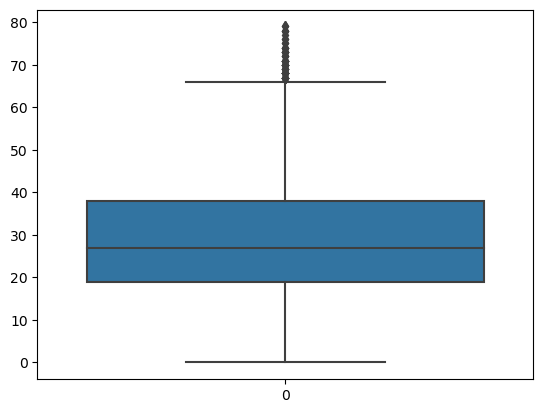

In [69]:
sns.boxplot(df0["Age"])
plt.show()

Regarding the age of the people that were transported. Avarage age is at 28 years with standart deviation of 14, 75% of the people were under the age of 38. People over near 65 years old are condired outliers. For the next steps worth checking outliers and their role in that trip, how much they spend and cabin they occupied.

In [70]:
df0["HomePlanet"].value_counts().reset_index()

,index,HomePlanet
0,Earth,3566
1,Europa,1673
2,Mars,1367


So we have 3 home lands and would be nice to know where is departure.

In [71]:
df0["CryoSleep"].value_counts()

False    4274
True     2332
Name: CryoSleep, dtype: int64

In [72]:
df0[["CryoSleep", "Age"]].groupby(by="CryoSleep").agg({"Age": "mean"})

,Age
CryoSleep,
False,29.813992
True,27.207976


Mean age for people who went for sleep during the trip diverse but not significant, only by two years. So suggestion that people of older age able to be put to cryo sleep or not, may be discarded. 

In [73]:
df0["Cabin"].value_counts()

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: Cabin, Length: 5305, dtype: int64

Grouping by the cabin does not provide any useful information, so let seperation into decks and sides.

In [74]:
df = df0.copy()

In [75]:
df["Deck"] = df["Cabin"].apply(lambda x: str(x).split("/")[0])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [76]:
df["Deck"].value_counts()

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: Deck, dtype: int64

In [77]:
df["Side"] = df["Cabin"].apply(lambda x: str(x).split("/")[2])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [78]:
df["Number"] = df["Cabin"].apply(lambda x: str(x).split("/")[1])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1


In [79]:
df["Number"].describe()

count     6606
unique    1734
top         82
freq        22
Name: Number, dtype: object

In [80]:
df["Side"].value_counts()

S    3345
P    3261
Name: Side, dtype: int64

Deck and side might be valuable information and we keep this columns. I believe we could drop column Cabin. Also, some people lived in the same cabin up to 22 people so it is not continuous variable but we going to keep without change. Later we apply the encoding to these features. 

In [81]:
df["Destination"].value_counts()

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

In [82]:
df["CryoSleep"] = df["CryoSleep"].astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Number
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1


In [83]:
df["VIP"] = df["VIP"].astype(int)
df["Transported"] = df["Transported"].astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Number
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,P,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,S,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,S,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,S,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,S,1


In [84]:
df["Total_amount_mean"] = (df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"])/5
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Number,Total_amount_mean
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,P,0,0.0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,S,0,147.2
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,S,0,2076.6
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,S,0,1035.2
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,S,1,218.2


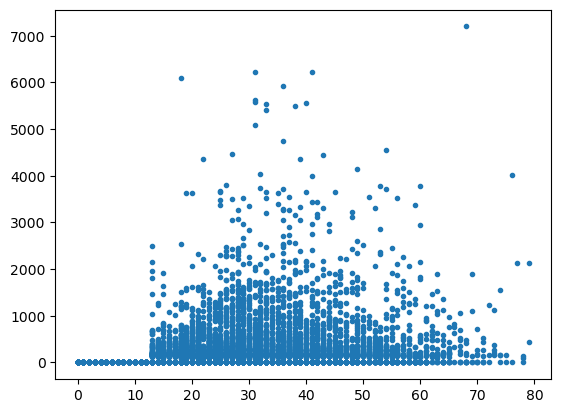

In [85]:
plt.plot(df["Age"], df["Total_amount_mean"],  ".")
plt.show()

In [86]:
df = df.drop(columns=["PassengerId", "Cabin", "Name"], axis=1)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Number,Total_amount_mean
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P,0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S,0,147.2
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,0,2076.6
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S,0,1035.2
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S,1,218.2


In [87]:
df_enc = pd.get_dummies(df, columns=["HomePlanet", "Destination", "Deck", "Side"], drop_first=True)
df_enc.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Number,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [88]:
df_enc["Transported"].value_counts()

1    3327
0    3279
Name: Transported, dtype: int64

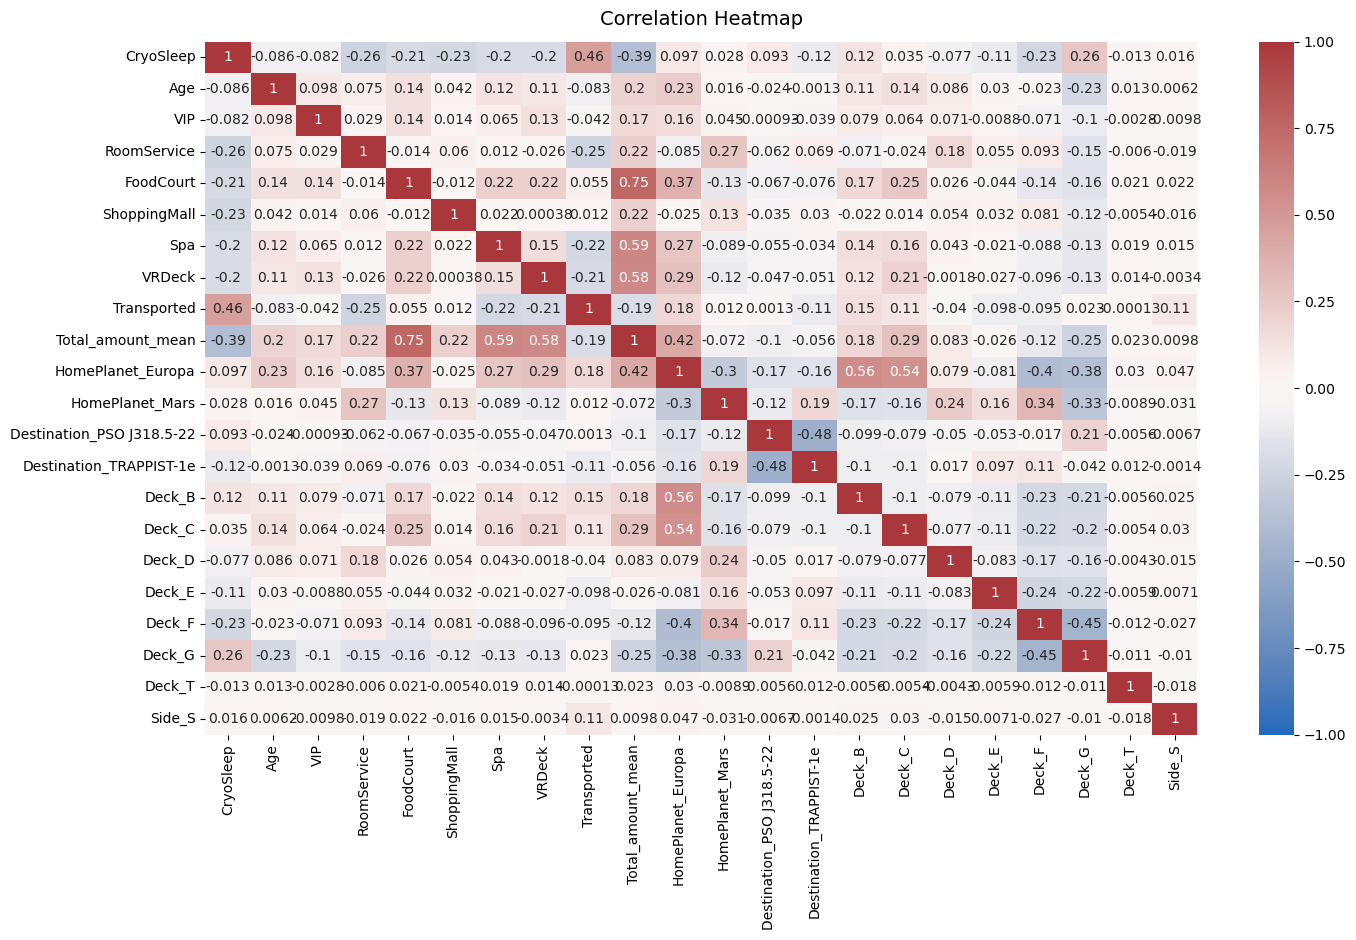

In [89]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_enc.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## Let's dive into construct phase of the analysis

In [90]:
Y = df_enc["Transported"]
X = df_enc.drop(columns=["Transported"], axis=1)

In [91]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

Logistic regression model as a first approach. Should be counted that I did not exclude outliers from the age column, so Logistic regression can give not a proper value.

In [92]:
clf_log = LogisticRegression(random_state=42, max_iter=500)
clf_log.fit(x_train, y_train)

/opt/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [93]:
y_pred_log = clf_log.predict(x_val)

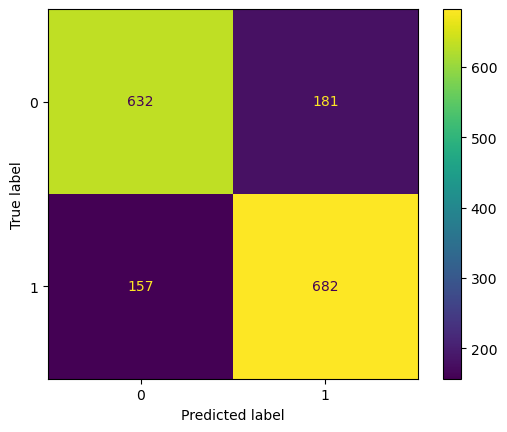

In [94]:
log_cm = confusion_matrix(y_val, y_pred_log, labels=clf_log.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=clf_log.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [95]:
clf_rf = RandomForestClassifier(random_state=42)

In [118]:
cv_params = {'max_depth': [3,5, None], 
             'max_features': [9,14,19],
             'max_samples': [0.05, 0.1, 0.3, 0.5],
             'min_samples_leaf': [1, 3, 5, 7],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [100, 300, 500],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(clf_rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [119]:
%%time
rf_cv.fit(x_train, y_train)

CPU times: user 52min 41s, sys: 11 s, total: 52min 52s
Wall time: 1h 51min 45s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [9, 14, 19],
                         'max_samples': [0.05, 0.1, 0.3, 0.5],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]},
             refit='f1', scoring={'accuracy', 'recall', 'precision', 'f1'})

In [120]:
 rf_cv.best_estimator_

RandomForestClassifier(max_features=19, max_samples=0.1, min_samples_leaf=5,
                       n_estimators=500, random_state=42)

In [121]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 19,
 'max_samples': 0.1,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [122]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [123]:
write_pickle("", rf_cv.best_estimator_, 'rf_cv_best_estimator')

In [124]:
rf_cv.best_score_

0.8035623893960235

In [146]:
def make_results(model_name: str, model_object, metric: str):
    '''
    Arguments:
        model_name (string): What you want the model to be called in the output table.
        model_object: A fit GridSearchCV object.
        metric (string): Precision, recall, f1, accuracy, or auc.
  
    Returns a pandas DataFrame with the F1, recall, precision, accuracy, and AUC scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    # Get all the results from the CV and put them in a DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the DataFrame with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and F1 score from that row
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']
  
    # Create DataFrame of results
    table = pd.DataFrame({
        'Model': [model_name],
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Accuracy': accuracy
    })
  
    return table


In [147]:
rf_result = make_results(model_name="Radom Forest", model_object=rf_cv, metric="f1")
rf_result

,Model,Precision,Recall,F1,Accuracy
0,Radom Forest,0.795496,0.812299,0.803562,0.800565


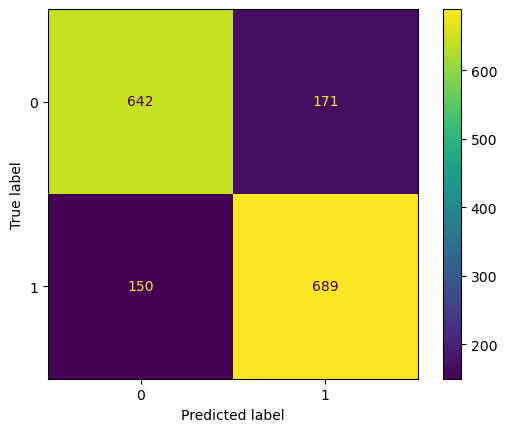

In [148]:
y_pred_rf = rf_cv.best_estimator_.predict(x_val)

log_cm = confusion_matrix(y_val, y_pred_rf, labels=rf_cv.best_estimator_.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=rf_cv.best_estimator_.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [173]:
x_train_xgb = x_train.drop(columns="Number", axis=1)

In [182]:
clf_xgb = XGBClassifier(objective="binary:logistic", random_state=42)

cv_params = {
    "max_depth": [3, 6, 9, 12],
    "min_child_weight": [3, 5, 7, 9],
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [100, 300, 500]
}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(clf_xgb, cv_params, scoring=scoring, cv=5, refit="f1")

In [183]:
%%time
xgb_cv.fit(x_train_xgb, y_train)

CPU times: user 48min 40s, sys: 4min 20s, total: 53min
Wall time: 1h 16min 24s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 6, 9, 12],
                         'min_child_weight': [3, 5, 7, 9],
                         'n_estimators': [100, 300, 500]},
             refit='f1', scoring={'accuracy', 'recall', 'precision', 'f1'})

In [184]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100}

In [185]:
xgb_result = make_results(model_name="XGB", model_object=xgb_cv, metric="f1")
xgb_result

,Model,Precision,Recall,F1,Accuracy
0,XGB,0.780883,0.838422,0.808547,0.800566


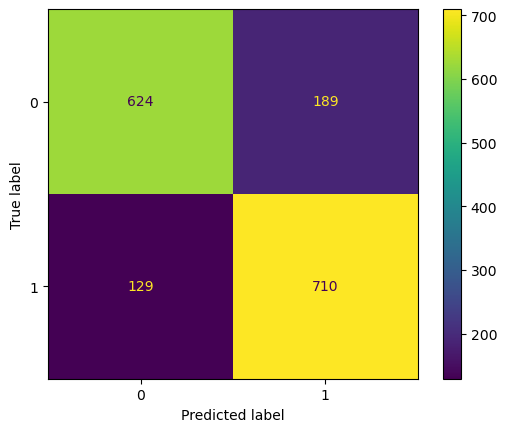

In [186]:
x_val_xgb = x_val.drop(columns=["Number"], axis=1)
y_pred_xgb = xgb_cv.best_estimator_.predict(x_val_xgb)

log_cm = confusion_matrix(y_val, y_pred_xgb, labels=xgb_cv.best_estimator_.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=xgb_cv.best_estimator_.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()